In [1]:
import numpy as np
from collections import defaultdict
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from me388 import QuantumBlackPCA
from feature_scaling import scale_features
from sklearn.model_selection import train_test_split
from bayes import bayes_output
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve

## ROC Graph Plotting

In [2]:
data = pd.DataFrame.from_csv('../DataFiles/train_withNaNinfo.csv')
data = data.fillna(data.mean())
cols = [col for col in data.columns if col != 'class'] 
features = data[cols]
bankrupt = data['class']
feature_train, feature_test, class_train, class_test = train_test_split(
     features, bankrupt, test_size=0.2, random_state=1)

forest = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.5, loss='deviance')
forest = forest.fit(feature_train, class_train)

In [3]:
output = forest.predict(feature_test)
proba_output = forest.predict_proba(feature_test)

In [4]:
fpr, tpr, thresholds = roc_curve(class_test, proba_output[:,1])

In [5]:
proba_output[:,1]

array([  1.20959331e-04,   1.95101330e-06,   4.12580315e-05, ...,
         1.69287105e-02,   4.85452960e-06,   1.31973502e-02])

In [6]:
output

array([0, 0, 0, ..., 0, 0, 0])

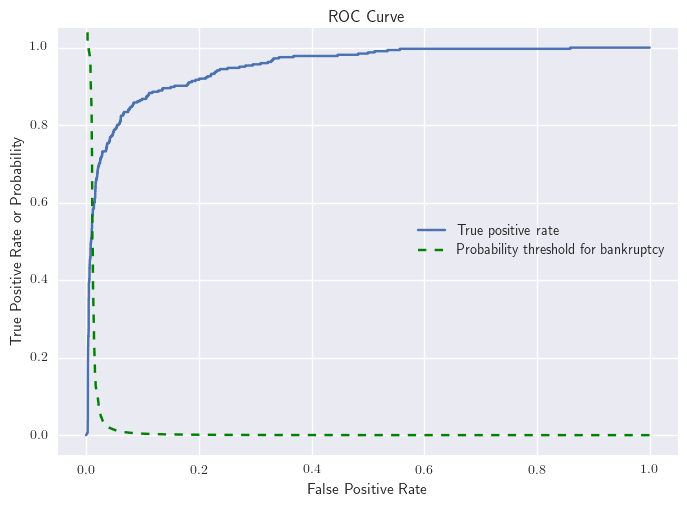

In [7]:
plt.plot(fpr,tpr,label="True positive rate")
plt.plot(fpr,thresholds,"--g",label="Probability threshold for bankruptcy")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate or Probability')
plt.title('ROC Curve')
plt.legend(loc="right")
plt.savefig('ROC.png',dpi=600)